<a href="https://colab.research.google.com/github/kevnantony/nykaa-ml/blob/main/main0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE

In [2]:
# Load the data
df = pd.read_csv('/content/cosmetics.csv')
# Check the first five rows
display(df.sample(5))
# Inspect the types of products
display(df['Label'].value_counts())

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
176,Moisturizer,LA MER,The Renewal Oil Mini,130,4.0,"Limnanthes Alba (Meadowfoam) Seed Oil, Dimethi...",1,1,1,1,1
1422,Sun protect,COOLA,Sport Continuous Spray SPF 50 - Unscented,36,4.4,"Alcohol (Organic), Algae (Organic) Extract, Al...",1,1,1,1,1
991,Face Mask,ALGENIST,PERFECT Clarifying Pore Corrector Mask,55,4.5,"Water, Kaolin, Glycerin, Ammonium Acryloyldime...",0,0,0,0,0
840,Face Mask,LA MER,The Lifting and Firming Mask,250,4.9,Declustered Water (-)/Aqua/Eau De-Structuree (...,0,0,0,0,0
1402,Sun protect,BELIF,Moisturizing Bomb Cushion Compact Broad Spectr...,42,3.7,*Fragrances of natural origin.,1,1,1,1,0


Moisturizer    298
Cleanser       281
Face Mask      266
Treatment      248
Eye cream      209
Sun protect    170
Name: Label, dtype: int64

In [4]:
# Filter for moisturizers
moisturizers = df[df['Label'] == 'Moisturizer']
cleanser = df[df['Label'] == 'Cleanser']
face_mask = df[df['Label'] == 'Face Mask']
treatment = df[df['Label'] == 'Treatment']
eye_cream = df[df['Label'] == 'Eye cream']
sun_protect = df[df['Label'] == 'Sun protect']
# Filter SPECIALLY PRODUCT For dry skin as well
moisturizers_dry = moisturizers[(moisturizers['Dry'] == 1)
                               & (moisturizers['Combination'] == 0)
                               & (moisturizers['Normal'] == 0)
                               & (moisturizers['Oily'] == 0)
                               & (moisturizers['Sensitive'] == 0)]
cleanser_dry = cleanser[(cleanser['Dry'] == 1)
                       & (cleanser['Combination'] == 0)
                       & (cleanser['Normal'] == 0)
                       & (cleanser['Oily'] == 0)
                       & (cleanser['Sensitive'] == 0)]
eye_cream_dry = eye_cream[(eye_cream['Dry'] == 1)
                         &(eye_cream['Combination'] == 0)
                         &(eye_cream['Normal'] == 0)
                         &(eye_cream['Oily'] == 0)
                         &(eye_cream['Sensitive'] == 0)]
sun_protect_dry =sun_protect[(sun_protect['Dry'] == 1)
                            &(sun_protect['Combination'] == 0)
                            &(sun_protect['Normal'] == 0)
                            &(sun_protect['Oily'] == 0)
                            &(sun_protect['Sensitive'] == 0)]

In [6]:
print(cleanser_dry)

        Label     Brand                       Name  Price  Rank  \
556  Cleanser  SHISEIDO  Extra Rich Cleansing Milk     36   5.0   

                                           Ingredients  Combination  Dry  \
556  Water, Sodium Methyl Cocoyl Taurate, Cocamidop...            0    1   

     Normal  Oily  Sensitive  
556       0     0          0  


In [13]:
moisturizers_comb = moisturizers[(moisturizers['Combination']== 1)]
cleanser_comb = cleanser[(cleanser['Combination']== 1)]
face_mask_comb = face_mask[(face_mask['Combination']== 1)]
treatment_comb = treatment[(treatment['Combination']== 1)]
eye_cream_comb = eye_cream[(eye_cream['Combination']== 1)]
sun_protect_comb = sun_protect[(sun_protect['Combination']== 1)]

cosmetics_combination = pd.concat([moisturizers_comb, cleanser_comb, face_mask_comb, treatment_comb, eye_cream_comb, sun_protect_comb], ignore_index = True, sort = True)

In [14]:
cosmetics_combination.describe().T

,count,mean,std,min,25%,50%,75%,max
Combination,966.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Dry,966.0,0.906832,0.290818,0.0,1.0,1.0,1.0,1.0
Normal,966.0,0.972050,0.164916,0.0,1.0,1.0,1.0,1.0
Oily,966.0,0.919255,0.272585,0.0,1.0,1.0,1.0,1.0
Price,966.0,55.993789,44.802202,3.0,30.0,42.0,68.0,345.0
Rank,966.0,4.170186,0.585791,0.0,4.0,4.3,4.5,5.0
Sensitive,966.0,0.762940,0.425500,0.0,1.0,1.0,1.0,1.0


##Top 10 for Moisturizers Products of Combination Type Skin

In [16]:
# Moisturizer Combination Type Skin Top 10
moisturizers_comb_top10 = moisturizers_comb.loc[moisturizers_comb.Combination == 1].sort_values("Rank", ascending = False)
moisturizers_comb_top10= moisturizers_comb_top10[['Name','Brand','Rank','Price']].head(10).reset_index()
moisturizers_comb_top10

,index,Name,Brand,Rank,Price
0,244,Water Bank Dual Layer Face Oil,LANEIGE,5.0,38
1,194,Limited Edition Dramatically Different™ Moistu...,CLINIQUE,5.0,39
2,149,Evercalm™ Overnight Recovery Balm,REN CLEAN SKINCARE,4.9,48
3,231,Advanced Night Repair Intensive Recovery Ampoules,ESTÉE LAUDER,4.9,115
4,297,Face Hero,GO-TO,4.8,34
5,51,Adaptogen Deep Moisture Cream,YOUTH TO THE PEOPLE,4.8,58
6,131,Superberry Hydrate + Glow Oil,YOUTH TO THE PEOPLE,4.8,44
7,119,Squalane + Omega Repair Cream,BIOSSANCE,4.7,58
8,161,Plantscription™ SPF 25 Power Anti-Aging Cream,ORIGINS,4.7,60
9,130,Peat Miracle Revital Cream,BELIF,4.7,58


##Lowest 10 Moisturizers Products of Combination Skin Type

In [17]:
# Moisturizer Combination Type Skin Lowest 10
moisturizers_comb_lowest10 = moisturizers_comb.loc[moisturizers_comb.Combination == 1].sort_values("Rank", ascending = False)
moisturizers_comb_lowest10= moisturizers_comb_lowest10[['Brand','Rank','Price']].tail(10).reset_index()
moisturizers_comb_lowest10

,index,Brand,Rank,Price
0,190,CAUDALIE,3.9,76
1,87,IT COSMETICS,3.8,68
2,100,PERRICONE MD,3.8,135
3,3,LA MER,3.8,175
4,200,MILK MAKEUP,3.8,24
5,226,SHISEIDO,3.7,115
6,162,LA MER,3.6,270
7,144,ORIGINS,3.5,45
8,98,LA MER,3.3,175
9,279,CLINIQUE,0.0,39


In [18]:
cosmetic = moisturizers_comb[moisturizers_comb['Rank'] == 5]
# Display each item's data and ingredients
display(cosmetic)
print(cosmetic.Ingredients.values)

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
194,Moisturizer,CLINIQUE,Limited Edition Dramatically Different™ Moistu...,39,5.0,"Water, Dimethicone, Isododecane, Butylene Glyc...",1,0,0,1,0
244,Moisturizer,LANEIGE,Water Bank Dual Layer Face Oil,38,5.0,"Water, Caprylic/Capric Triglyceride, Squalane,...",1,1,1,0,0


["Water, Dimethicone, Isododecane, Butylene Glycol, Bis-Peg-18 Methyl Ether Dimethyl Silane, Glycerin, Laminaria Saccharina Extract, Polygonum Cuspidatum Root Extract, Saccharomyces Lysate Extract, Cucumis Sativus (Cucumber) Fruit Extract, Hordeum Vulgare (Barley) Extract/Extrait D'Orge, Helianthus Annuus (Sunflower) Seedcake, Caffeine, Trehalose, Sodium Hyaluronate, Tocopheryl Acetate, Chamomilla Recutita (Matricaria), Polysilicone-11, Silica, Propylene Glycol Dicaprate, Oleth-10, Lactobacillus Ferment, Laureth-23, Laureth-4, Ammonium Acryloyldimethyltaurate/Vp Copolymer, Carbomer, Caprylyl Glycol, Hexylene Glycol, Tromethamine, Disodium Edta, Phenoxyethanol, Potassium Sorbate, Yellow 5 (Ci 19140), Red 4 (Ci 14700), Yellow 6 (Ci 15985)."
 'Water, Caprylic/Capric Triglyceride, Squalane, Vitis Vinifera (Grape) Seed Oil, Decyl Cocoate, Dicaprylyl Carbonate, Triethylhexanoin, Glycerin, Passiflora Incarnata Seed Oil, Macadamia Ternifolia Seed Oil, Chenopodium Quinoa Seed Extract, Magnesium

##Dry Skin Type

In [19]:
moisturizers_dry = moisturizers[(moisturizers['Dry'] == 1)]
cleanser_dry = cleanser[(cleanser['Dry'] == 1)]
face_mask_dry = face_mask[(face_mask['Dry']== 1)]
treatment_dry = treatment[(treatment['Dry']== 1)]
eye_cream_dry = eye_cream[(eye_cream['Dry']== 1)]
sun_protect_dry = sun_protect[(sun_protect['Dry']== 1)]

cosmetics_dry = pd.concat([moisturizers_dry,cleanser_dry,face_mask_dry,treatment_dry, eye_cream_dry, sun_protect_dry], ignore_index=True, sort=True)

In [20]:
cosmetics_dry.describe().T

,count,mean,std,min,25%,50%,75%,max
Combination,904.0,0.969027,0.173342,0.0,1.0,1.0,1.0,1.0
Dry,904.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Normal,904.0,0.982301,0.131928,0.0,1.0,1.0,1.0,1.0
Oily,904.0,0.896018,0.305407,0.0,1.0,1.0,1.0,1.0
Price,904.0,57.921460,46.575311,3.0,30.0,45.0,69.0,345.0
Rank,904.0,4.166814,0.599469,0.0,4.0,4.3,4.5,5.0
Sensitive,904.0,0.799779,0.400387,0.0,1.0,1.0,1.0,1.0


##Normal Skin Type

In [21]:
moisturizers_normal = moisturizers[(moisturizers['Normal'] == 1)]
cleanser_normal = cleanser[(cleanser['Normal'] == 1)]
face_mask_normal = face_mask[(face_mask['Normal']== 1)]
treatment_normal = treatment[(treatment['Normal']== 1)]
eye_cream_normal = eye_cream[(eye_cream['Normal']== 1)]
sun_protect_normal = sun_protect[(sun_protect['Normal']== 1)]

cosmetics_normal = pd.concat([moisturizers_normal,cleanser_normal,face_mask_normal,treatment_normal, eye_cream_normal, sun_protect_normal], ignore_index=True, sort=True)

##Oily Skin Type


In [22]:
moisturizers_oily = moisturizers[(moisturizers['Oily'] == 1)]
cleanser_oily = cleanser[(cleanser['Oily'] == 1)]
face_mask_oily = face_mask[(face_mask['Oily']== 1)]
treatment_oily = treatment[(treatment['Oily']== 1)]
eye_cream_oily = eye_cream[(eye_cream['Oily']== 1)]
sun_protect_oily = sun_protect[(sun_protect['Oily']== 1)]

cosmetics_normal = pd.concat([moisturizers_oily,cleanser_oily,face_mask_oily,treatment_oily, eye_cream_oily, sun_protect_oily], ignore_index=True, sort=True)

##Sensitive Skin Type

In [23]:
moisturizers_sensitive = moisturizers[(moisturizers['Sensitive'] == 1)]
cleanser_sensitive = cleanser[(cleanser['Sensitive'] == 1)]
face_mask_sensitive = face_mask[(face_mask['Sensitive']== 1)]
treatment_sensitive = treatment[(treatment['Sensitive']== 1)]
eye_cream_sensitive = eye_cream[(eye_cream['Sensitive']== 1)]
sun_protect_sensitive = sun_protect[(sun_protect['Sensitive']== 1)]

cosmetics_sensitive = pd.concat([moisturizers_sensitive,cleanser_sensitive,face_mask_sensitive,treatment_sensitive, eye_cream_sensitive, sun_protect_sensitive], ignore_index=True, sort=True)

In [24]:
cosmetics_sensitive.describe().T

,count,mean,std,min,25%,50%,75%,max
Combination,756.0,0.974868,0.156630,0.0,1.0,1.0,1.00,1.0
Dry,756.0,0.956349,0.204452,0.0,1.0,1.0,1.00,1.0
Normal,756.0,0.982804,0.130086,0.0,1.0,1.0,1.00,1.0
Oily,756.0,0.915344,0.278554,0.0,1.0,1.0,1.00,1.0
Price,756.0,55.917989,46.921111,3.0,30.0,42.0,67.25,345.0
Rank,756.0,4.163095,0.558807,0.0,4.0,4.2,4.50,5.0
Sensitive,756.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0


##Exploratory Data Analysis

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 2000x1500 with 0 Axes>

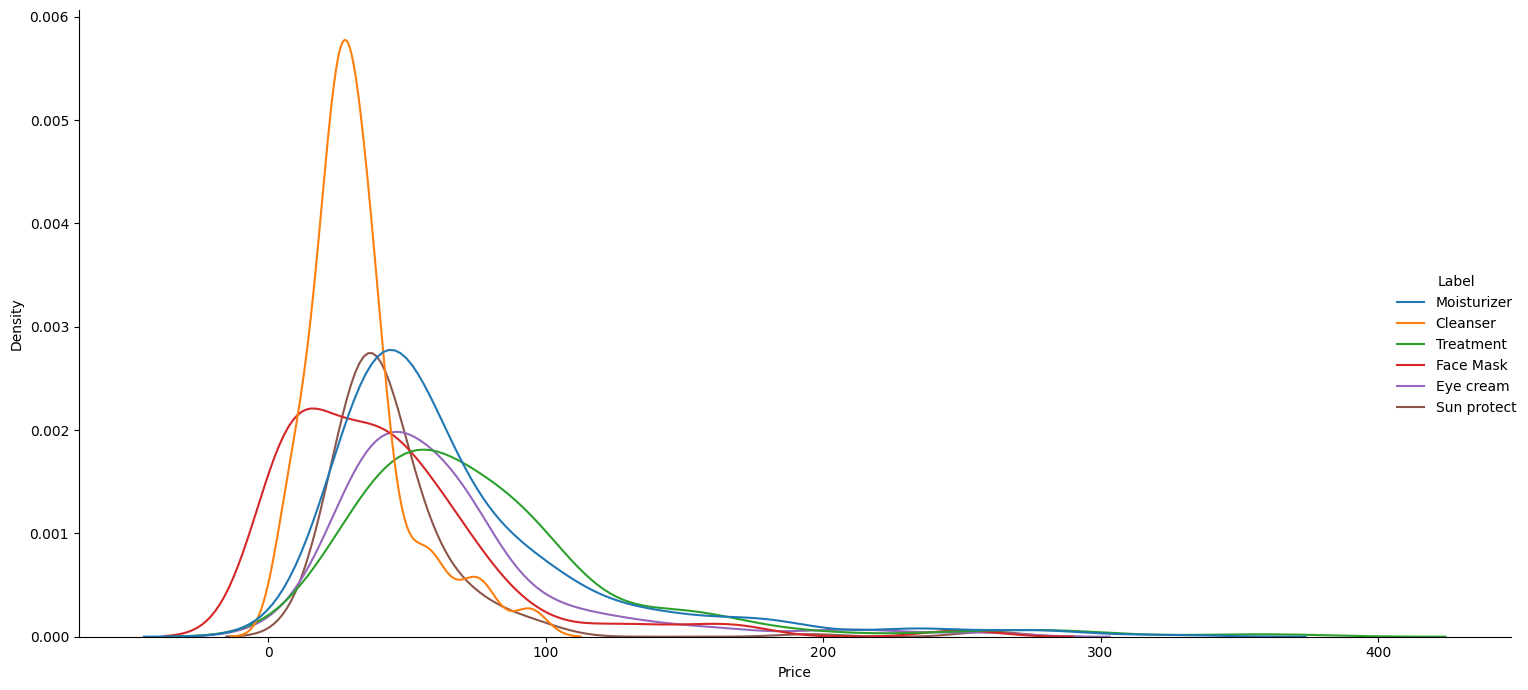

In [26]:
plt.figure(figsize = (20,15))
sns.displot(data = df,
            x= 'Price'
            ,hue = 'Label',
            kind= 'kde',
            height = 7,
            aspect = 2 )
plt.tight_layout()
plt.savefig('firstplot_tight1.png', dpi=200);

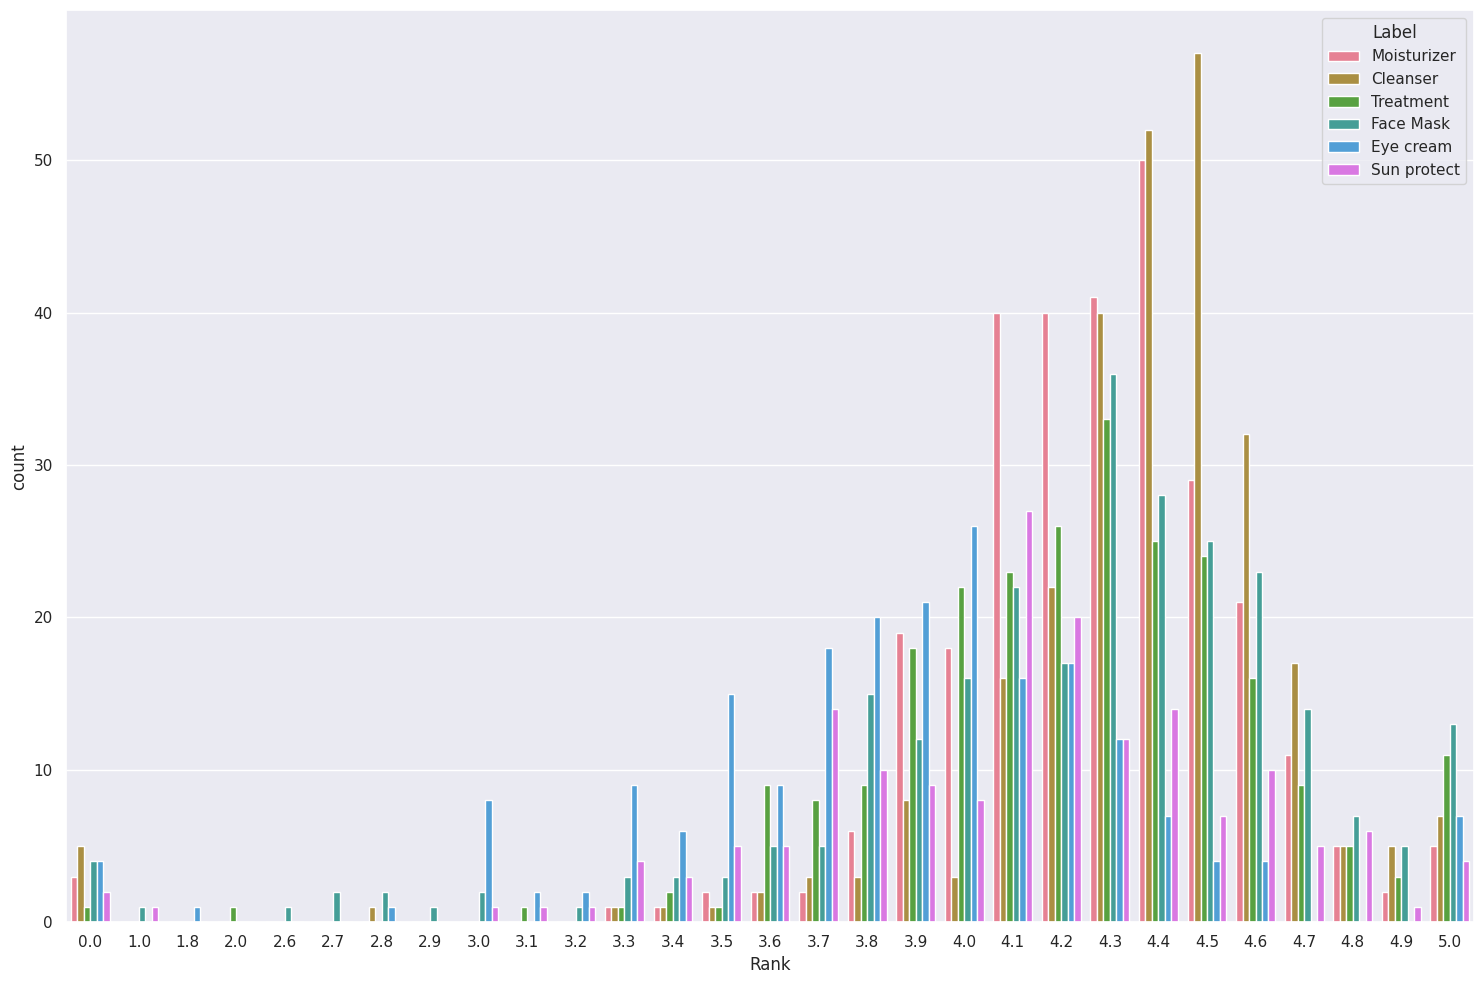

In [27]:
plt.figure(figsize = (15,10))
sns.set_theme(style = 'darkgrid')
sns.countplot(x = 'Rank', hue = 'Label', data = df, palette = 'husl')
plt.tight_layout()
plt.savefig('firstplot_tight2.png', dpi=200);

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
vectorizer = CountVectorizer(binary=True, lowercase=True, stop_words=None, tokenizer=lambda x: x.split(', '))
binary_bag_of_words = vectorizer.fit_transform(moisturizers_dry['Ingredients'].astype(str))

# Creating ingredient_idx dictionary
ingredient_idx = {word: index for index, word in enumerate(vectorizer.get_feature_names_out())}

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [40]:
# Get the number of items and tokens
M = len(moisturizers_dry)
N = len(ingredient_idx)
# Initialize a matrix of zeros
A = np.zeros((M,N))
A.shape

(190, 2233)

In [41]:
# Define the oh_encoder function
def oh_encoder(tokens):
    x = np.zeros(N)
    for ingredient in tokens:
        # Get the index for each ingredient
        idx = ingredient_idx[ingredient]
        # Put 1 at the corresponding indices
        x[idx] = 1
    return x

In [42]:
# Make a document-term matrix
i = 0
for tokens in corpus:
    A[i, :] = oh_encoder(tokens)
    i += 1

In [43]:
# Dimension reduction with t-SNE
model = TSNE(n_components = 2, learning_rate = 200, random_state = 42)
tsne_features = model.fit_transform(A)
# Make X, Y columns
moisturizers_dry['X'] = tsne_features[:,0]
moisturizers_dry['Y'] = tsne_features[:,1]
from bokeh.io import show, output_notebook, push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
output_notebook()
# Make a source and a scatter plot
source = ColumnDataSource(moisturizers_dry)
plot = figure(x_axis_label = 'T-SNE 1',
              y_axis_label = 'T-SNE 2',
              width = 500, height = 400)
plot.circle(x = 'X',
            y = 'Y',
            source = source,
            size = 10, color = '#FF7373', alpha = .8)
# Create a HoverTool object
hover = HoverTool(tooltips = [('Item', '@Name'),
('Brand', '@Brand'),
('Price', '$@Price'),
('Rank', '@Rank')])
plot.add_tools(hover)
# Plot the map
show(plot)

<ipython-input-43-b2b276a12846>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moisturizers_dry['X'] = tsne_features[:,0]
<ipython-input-43-b2b276a12846>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moisturizers_dry['Y'] = tsne_features[:,1]
